In [1]:
import pandas as pd
import matplotlib.ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
def filter_empty_labels(data, labels):
    list = []
    for i in range(len(data)):
        if (data[i] * 100 / np.sum(data)) > 0:  # 0%
            list.append(labels[i])
        else:
            list.append('')
    return list

In [3]:
def percent_format(x, pos):
    return '%1.f%s' % (100*x, "%")

In [4]:
greens = ["#B2CB20", "#98BA02", "#6EA704", "#5C9202", "#358004"]
oranges = ["#FFDF77", "#FCCF3E", "#FBB124", "#FD9A24", "#FA8223"]
reds = ["#FF7B7B", "#FF5252", "#FF0000", "#D80000", "#A70000"]

sns.set()

In [5]:
df = pd.read_csv("https://zenodo.org/record/4672643/files/results-anonymised-2021-02-11-processed.csv", delimiter=',', dtype={'Age': pd.Int64Dtype()})

In [6]:
df_check_for_null = df[['Age', 'Gender']]
total = df_check_for_null.isnull().sum().sort_values(ascending=False)
percent = (df_check_for_null.isnull().sum() / df_check_for_null.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

df = df.fillna({'Gender': 'other/unspecified'})

        Total   Percent
Gender      1  0.027778
Age         0  0.000000


---
Age:
count    36.000000
mean     30.166667
std      11.826121
min      20.000000
25%      23.000000
50%      25.000000
75%      32.250000
max      69.000000
Name: Age, dtype: float64
median: 25.0
iqr: 9.25
---
Gender:
count     36
unique     3
top        M
freq      20
Name: Gender, dtype: object
---
Age/Gender:
-Males:
count    20.000000
mean     30.300000
std      10.073937
min      21.000000
25%      23.750000
50%      25.000000
75%      35.750000
max      53.000000
Name: Age, dtype: float64
-Females:
count    15.000000
mean     27.400000
std       9.796501
min      20.000000
25%      22.500000
50%      24.000000
75%      28.500000
max      60.000000
Name: Age, dtype: float64
-Others/Unspecified:
count     1.0
mean     69.0
std       NaN
min      69.0
25%      69.0
50%      69.0
75%      69.0
max      69.0
Name: Age, dtype: float64


/home/adrien/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


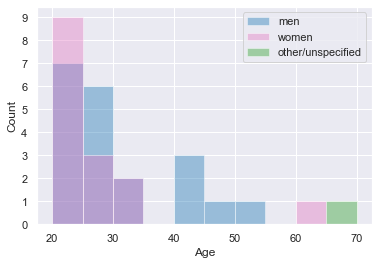

<Figure size 432x288 with 0 Axes>

In [7]:
# ---Profiles---
    # -Age/Gender-
    print("---\nAge:")
    print(df.Age.describe())
    q3, q1 = np.percentile(df.Age, [75,25])
    iqr = q3 - q1
    print("median: " + str(df.Age.median()))
    print("iqr: " + str(iqr))
    print("---\nGender:")
    print(df.Gender.describe())

    df_age_filtered = df.dropna(subset=['Age'])

    sns.set_palette(sns.color_palette(['#1f77b4','#e377c2','#2ca02c']))

    print("---\nAge/Gender:")
    print("-Males:")
    print(df_age_filtered.Age[df_age_filtered.Gender == 'M'].describe())
    print("-Females:")
    print(df_age_filtered.Age[df_age_filtered.Gender == 'F'].describe())
    print("-Others/Unspecified:")
    print(df_age_filtered.Age[df_age_filtered.Gender == 'other/unspecified'].describe())

    sns.distplot(df_age_filtered.Age[df_age_filtered.Gender == 'M'], label='men', kde=False, bins=range(20,75,5))
    sns.distplot(df_age_filtered.Age[df_age_filtered.Gender == 'F'], label='women', kde=False, bins=range(20,75,5))
    sns.distplot(df_age_filtered.Age[df_age_filtered.Gender == 'other/unspecified'], label='other/unspecified',
                 kde=False, bins=range(20,75,5))

    ax = plt.gca()
    ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
    plt.clf()

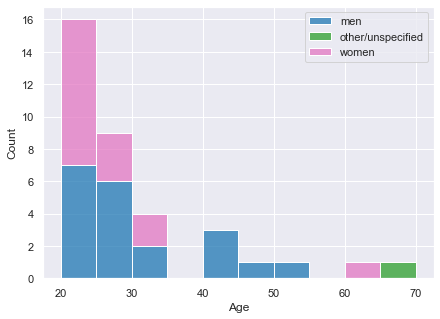

<Figure size 432x288 with 0 Axes>

In [8]:
#alternative: age-gender-stacked
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(1, 1, 1)
g = sns.histplot(data=df_age_filtered, ax=ax, stat="count", multiple="stack",
                 x="Age", kde=False,
                 palette=sns.color_palette(['#e377c2','#2ca02c', '#1f77b4']), hue="Gender",
                 element="bars", legend=False, bins=range(20,75,5))


plt.legend(['men', 'other/unspecified', 'women'], loc='upper right')
plt.show()
plt.clf()

---
Age:
count    36.000000
mean     30.166667
std      11.826121
min      20.000000
25%      23.000000
50%      25.000000
75%      32.250000
max      69.000000
Name: Age, dtype: float64


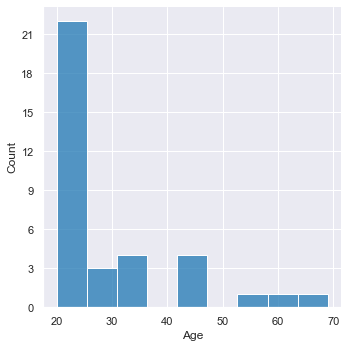

<Figure size 432x288 with 0 Axes>

In [9]:
# -Age-
print("---\nAge:")
print(df_age_filtered.Age.describe())
# sns.distplot(df.XP, kde=False)  # some respondents will indicate XP=0, so the KDE would include negative values
# sns.displot(df.XP, kde=False, stat = 'density')  # some respondents will indicate XP=0, so the KDE would include negative values
sns.displot(df_age_filtered.Age)
ax = plt.gca()
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.clf()

---
XP:
count    36.000000
mean      7.250000
std       7.954783
min       0.000000
25%       2.000000
50%       3.000000
75%      10.500000
max      30.000000
Name: XP, dtype: float64
median: 3.0
iqr: 8.5


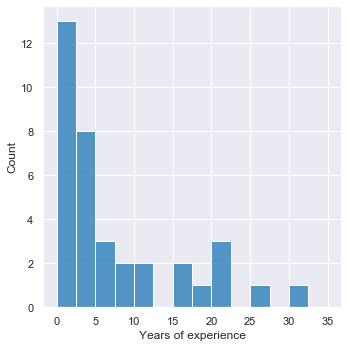

<Figure size 432x288 with 0 Axes>

In [10]:
print("---\nXP:")
print(df.XP.describe())
q3, q1 = np.percentile(df.XP, [75, 25])
iqr = q3 - q1
print("median: " + str(df.XP.median()))
print("iqr: " + str(iqr))


# sns.distplot(df.XP, kde=False)  # some respondents will indicate XP=0, so the KDE would include negative values
# sns.displot(df.XP, kde=False, stat = 'density')  # some respondents will indicate XP=0, so the KDE would include negative values
sns.displot(df.XP, bins=[0,2.5,5,7.50,10.00,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35], kde=False)  # some respondents will indicate XP=0, so the KDE would include negative values
ax = plt.gca()
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.xlabel('Years of experience')
plt.ylabel('Count')
plt.show()
plt.clf()

---
XP/Gender:
-Males:
count    20.000000
mean      7.800000
std       9.047244
min       0.000000
25%       2.000000
50%       3.000000
75%      16.000000
max      30.000000
Name: XP, dtype: float64
-Females:
count    15.000000
mean      7.000000
std       6.546537
min       1.000000
25%       2.000000
50%       5.000000
75%       9.500000
max      25.000000
Name: XP, dtype: float64
-other/unspecified:
count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: XP, dtype: float64


/home/adrien/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


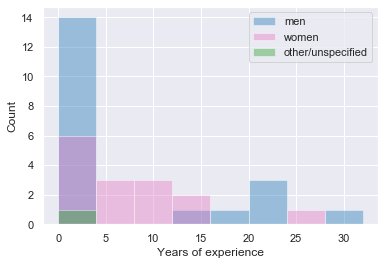

<Figure size 432x288 with 0 Axes>

In [11]:
# -XP/Gender-
print("---\nXP/Gender:")
print("-Males:")
print(df.XP[df.Gender == 'M'].describe())
print("-Females:")
print(df.XP[df.Gender == 'F'].describe())
print("-other/unspecified:")
print(df.XP[df.Gender == 'other/unspecified'].describe())

sns.distplot(df.XP[df.Gender == 'M'], label='men', kde=False, bins=range(0,36,4))  # same issue as above, should be False
sns.distplot(df.XP[df.Gender == 'F'], label='women', kde=False, bins=range(0,36,4))
sns.distplot(df.XP[df.Gender == 'other/unspecified'], label='other/unspecified', kde=False, bins=range(0,36,4))

ax = plt.gca()
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

plt.xlabel('Years of experience')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.clf()

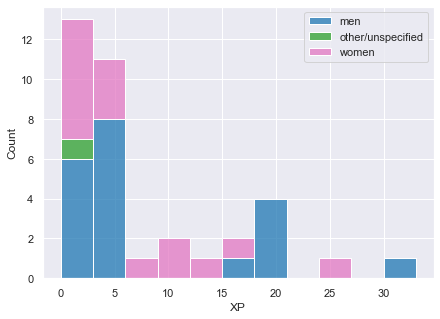

<Figure size 432x288 with 0 Axes>

In [12]:
# alternative: age-gender-stacked
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(1, 1, 1)
g = sns.histplot(data=df, ax=ax, stat="count", multiple="stack",
             x="XP", kde=False,
             palette=sns.color_palette(['#e377c2', '#2ca02c', '#1f77b4']), hue="Gender",
             element="bars", legend=False, bins=range(0,35,3))

plt.legend(['men', 'other/unspecified', 'women'], loc='upper right')
plt.show()
plt.clf()

<Figure size 1040x800 with 0 Axes>

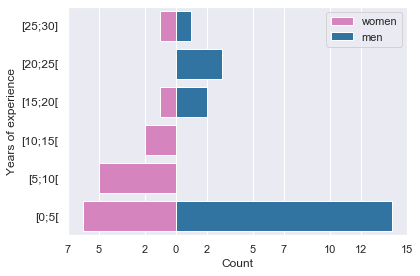

<Figure size 432x288 with 0 Axes>

In [13]:
# pyramid-xp-gender

bins = range(0, 35, 5)
men_histdata = np.histogram(df.XP[df["Gender"] == "M"], bins)[0]
women_histdata = np.histogram(df.XP[df["Gender"] == "F"], bins)[0]
women_histdata = np.negative(women_histdata)

xp_bins = []
for index, threshold in enumerate(bins[:-2]):
    xp_bins.append("[" + str(threshold) + ";" + str(bins[index + 1]) + "[")
xp_bins.append("[" + str(bins[len(bins) - 2]) + ";" + str(bins[len(bins) - 1]) + "]")

test = (women_histdata, men_histdata)
dftest = pd.DataFrame(test, index=['women_hist', 'men_hist'], columns=xp_bins)
dftest['Gender'] = ['women', 'men']

dftest = dftest.melt(id_vars=['Gender'], var_name='xp_bin', value_name='count')

plt.figure(figsize=(13, 10), dpi=80)
fig, ax = plt.subplots()
group_col = 'Gender'
order_of_bars = dftest["xp_bin"].unique()[::-1]
colors = ['#e377c2', '#1f77b4']

for c, group in zip(colors, dftest[group_col].unique()):
    bar = sns.barplot(x="count", y='xp_bin', data=dftest.loc[dftest[group_col] == group, :], order=order_of_bars,
                      color=c,  # palette=sns.color_palette(['#e377c2', '#2ca02c', '#1f77b4']), #color='hls',
                      label=group)

# Decorations
plt.xlabel("Count")
plt.ylabel("Years of experience")
plt.yticks(fontsize=12)
xticks = plt.gca().get_xticks().astype(np.int)
plt.xticks(xticks, labels=np.abs(xticks))
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

<Figure size 1040x800 with 0 Axes>

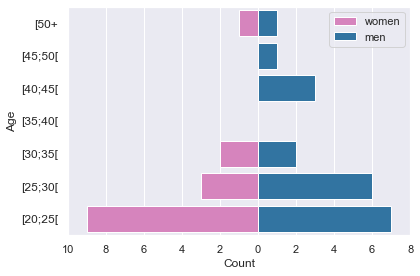

<Figure size 432x288 with 0 Axes>

In [14]:
# pyramid-age-gender

bins = list(range(20,55,5))
bins.append(75)
men_histdata=np.histogram(df.Age[df["Gender"] == "M"], bins)[0]
women_histdata=np.histogram(df.Age[df["Gender"] == "F"], bins)[0]
women_histdata = np.negative(women_histdata)

age_bins = []
for index, threshold in enumerate(bins[:-2]):
    age_bins.append("["+str(threshold)+";"+str(bins[index+1])+"[")
age_bins.append("[" + str(bins[len(bins)-2]) + "+")

test = (women_histdata, men_histdata)
dftest = pd.DataFrame(test, index=['women_hist', 'men_hist'], columns=age_bins)
dftest['Gender']=['women', 'men']

dftest = dftest.melt(id_vars=['Gender'], var_name='age_bin', value_name='count')

plt.figure(figsize=(13, 10), dpi=80)
fig, ax = plt.subplots()
group_col = 'Gender'
order_of_bars = dftest["age_bin"].unique()[::-1]
colors = ['#e377c2', '#1f77b4']

for c, group in zip(colors, dftest[group_col].unique()):
    bar = sns.barplot(x="count", y='age_bin', data=dftest.loc[dftest[group_col] == group, :], order=order_of_bars, color=c, #palette=sns.color_palette(['#e377c2', '#2ca02c', '#1f77b4']), #color='hls',
                label=group)

# Decorations
plt.xlabel("Count")
plt.ylabel("Age")
plt.yticks(fontsize=12)
xticks = plt.gca().get_xticks().astype(np.int)
plt.xticks(xticks, labels=np.abs(xticks))
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

||||||||||| pie-pm-def-valid
[4, 18, 12]


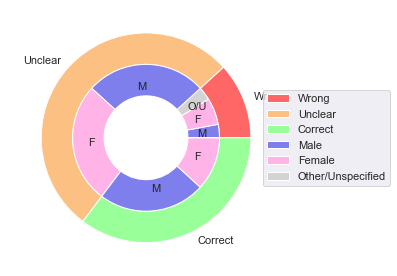

<Figure size 432x288 with 0 Axes>

In [15]:
# -pm-def-valid/Gender-
colors = ['#ff6666', '#fcc083', '#99ff99', '#66b3ff']
colors_gender = ['#7e7eed', '#ffb3e6', '#d3d3d3', '#7e7eed', '#ffb3e6', '#d3d3d3', '#7e7eed', '#ffb3e6', '#d3d3d3']

df_pm_aware = df[df['PM-aware'] == 'Y']

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

pie, _ = ax.pie(
    [len(df[(df['pm-def-valid'] == 0) & (df['PM-aware'] == 'Y')]), len(df[df['pm-def-valid'] == 1]), len(df[df['pm-def-valid'] == 2])],
    radius=1, labels=["Wrong", "Unclear", "Correct"], colors=colors)
plt.setp(pie, width=width, edgecolor='white')

print("||||||||||| pie-pm-def-valid")
print([len(df[(df['pm-def-valid'] == 0) & (df['PM-aware'] == 'Y')]), len(df[df['pm-def-valid'] == 1]), len(df[df['pm-def-valid'] == 2])])

labels = ['M', 'F', 'O/U', 'M', 'F', 'O/U', 'M', 'F', 'O/U']
in_data = [len(df[(df['pm-def-valid'] == 0) & (df['PM-aware'] == 'Y') & (df['Gender'] == 'M')]),
           len(df[(df['pm-def-valid'] == 0) & (df['PM-aware'] == 'Y') & (df['Gender'] == 'F')]),
           len(df[(df['pm-def-valid'] == 0) & (df['PM-aware'] == 'Y') & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['pm-def-valid'] == 1) & (df['Gender'] == 'M')]),
           len(df[(df['pm-def-valid'] == 1) & (df['Gender'] == 'F')]),
           len(df[(df['pm-def-valid'] == 1) & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['pm-def-valid'] == 2) & (df['Gender'] == 'M')]),
           len(df[(df['pm-def-valid'] == 2) & (df['Gender'] == 'F')]),
           len(df[(df['pm-def-valid'] == 2) & (df['Gender'] == 'other/unspecified')]),
           ]
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.7, colors=colors_gender)
plt.setp(pie2, width=width, edgecolor='white')
plt.legend(['Wrong','Unclear', 'Correct', 'Male', 'Female', 'Other/Unspecified'],bbox_to_anchor=(1.4,.5), loc='center right')
plt.tight_layout()
plt.show()
plt.clf()

VR-familiar [N/Y][11, 25]
vr-familiar-tried-actual-vr in
[11, 9, 16]


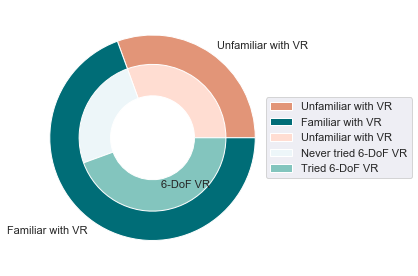

<Figure size 432x288 with 0 Axes>

In [16]:
# -pie-vr-familiar-tried-actual-vr-

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

colors_no_yes = ['#e29578', '#006d77']
colors_no_notreally_yes = ['#ffddd2', '#edf6f9', '#83c5be']

out_data = [len(df[df['VR-familiar'] == 'N']), len(df[df['VR-familiar'] == 'Y'])]
print("VR-familiar [N/Y]" + str(out_data))
pie, _ = ax.pie(
    out_data,
    radius=.98, labels=filter_empty_labels(out_data, ["Unfamiliar with VR", "Familiar with VR"]), colors=colors_no_yes)
plt.setp(pie, width=width, edgecolor='white')

labels = ['', '', '6-DoF VR']
in_data = [len(df[(df['VR-familiar'] == 'N')]),
           len(df[(df['VR-familiar'] == 'Y') & (df['tried-actual-vr'] == 'N')]),
           len(df[(df['VR-familiar'] == 'Y') & (df['tried-actual-vr'] == 'Y')]),
           ]
print("vr-familiar-tried-actual-vr in")
print(in_data)
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.65, colors=colors_no_notreally_yes)
plt.setp(pie2, width=width, edgecolor='white')
plt.legend(['Unfamiliar with VR', 'Familiar with VR', 'Unfamiliar with VR', 'Never tried 6-DoF VR', 'Tried 6-DoF VR'], bbox_to_anchor=(1.2, .5),
           loc='center')
plt.tight_layout()
plt.show()
plt.clf()

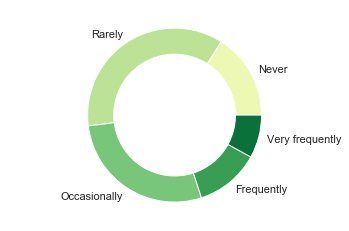

<Figure size 432x288 with 0 Axes>

In [17]:
# -pie-vr-freq

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

out_data = [len(df[df['VR-freq'] == 'never']), len(df[df['VR-freq'] == 'rare']), len(df[df['VR-freq'] == 'occas']), len(df[df['VR-freq'] == 'freq']), len(df[df['VR-freq'] == 'vfreq'])]
pie, _ = ax.pie(
    out_data,
    radius=1, labels=filter_empty_labels(out_data, ["Never", "Rarely", "Occasionally", "Frequently", "Very frequently"]), colors=sns.color_palette("YlGn",5))
plt.setp(pie, width=width, edgecolor='white')

plt.show()
plt.clf()

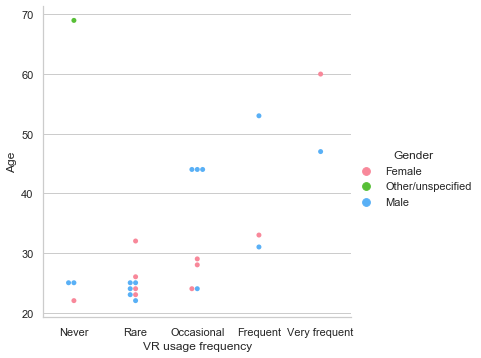

<Figure size 432x288 with 0 Axes>

In [18]:
# -swarm-VR-freq-age
sns.set_style("whitegrid")
sns.set_palette("tab10",2)
g = sns.catplot(x="VR-freq", y="Age", kind="swarm", order= ["never", "rare", "occas", "freq", "vfreq"], hue="Gender",data=df, legend_out=True)
g.set_xticklabels(['Never', 'Rare', 'Occasional', 'Frequent', 'Very frequent'])
new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.xlabel('VR usage frequency')
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()
plt.clf()

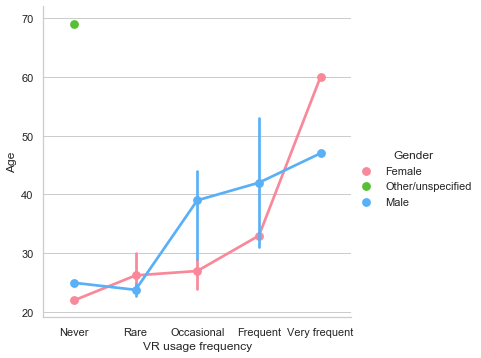

<Figure size 432x288 with 0 Axes>

In [19]:
# -regression-VR-freq-age
#TODO: should map never=0, rare=1, etc and then draw a regplot on top of the swarmplot

sns.set_palette("tab10", 2)
g= sns.catplot(x="VR-freq", y="Age", hue="Gender",order=["never", "rare", "occas", "freq", "vfreq"], kind="point", data=df)
g.set_xticklabels(['Never', 'Rare', 'Occasional', 'Frequent', 'Very frequent'])
new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.xlabel('VR usage frequency')
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()
plt.clf()

VR-familiar [N/Y][11, 25]


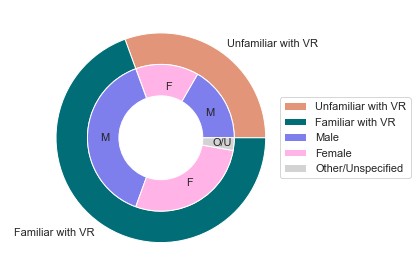

<Figure size 432x288 with 0 Axes>

In [20]:
# -VR-familiar/Gender-

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3


out_data = [len(df[df['VR-familiar'] == 'N']), len(df[df['VR-familiar'] == 'Y'])]
print("VR-familiar [N/Y]" + str(out_data))
pie, _ = ax.pie(
    out_data,
    radius=1, labels=filter_empty_labels(out_data,["Unfamiliar with VR", "Familiar with VR"]), colors=colors_no_yes)
plt.setp(pie, width=width, edgecolor='white')

labels = ['M', 'F', 'O/U', 'M', 'F', 'O/U']
in_data = [len(df[(df['VR-familiar'] == 'N') & (df['Gender'] == 'M')]),
       len(df[(df['VR-familiar'] == 'N') & (df['Gender'] == 'F')]),
       len(df[(df['VR-familiar'] == 'N') & (df['Gender'] == 'other/unspecified')]),
       len(df[(df['VR-familiar'] == 'Y') & (df['Gender'] == 'M')]),
       len(df[(df['VR-familiar'] == 'Y') & (df['Gender'] == 'F')]),
       len(df[(df['VR-familiar'] == 'Y') & (df['Gender'] == 'other/unspecified')]),
       ]
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.7, colors=colors_gender)
plt.setp(pie2, width=width, edgecolor='white')
plt.legend(
    ['Unfamiliar with VR', 'Familiar with VR', 'Male', 'Female', 'Other/Unspecified'],
    bbox_to_anchor=(1.1, .5),
    loc='center')
plt.tight_layout()
plt.show()
plt.clf()

tried-actual-vr [N/Y][20, 16]
tried-actual-vr/gender
[11, 8, 1, 9, 7, 0]


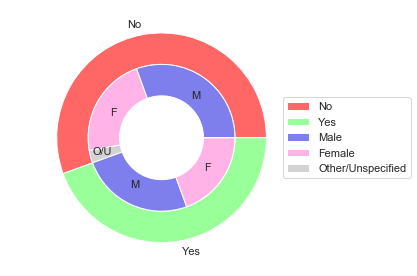

<Figure size 432x288 with 0 Axes>

In [21]:
# -tried-actual-vr/Gender-

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

colors_no_yes = ['#ff6666', '#99ff99']

out_data = [len(df[df['tried-actual-vr'] == 'N']), len(df[df['tried-actual-vr'] == 'Y'])]
print("tried-actual-vr [N/Y]" + str(out_data))
pie, _ = ax.pie(
    out_data,
    radius=1, labels=filter_empty_labels(out_data, ["No", "Yes"]), colors=colors_no_yes)
plt.setp(pie, width=width, edgecolor='white')

labels = ['M', 'F', 'O/U', 'M', 'F', 'O/U']
in_data = [len(df[(df['tried-actual-vr'] == 'N') & (df['Gender'] == 'M')]),
           len(df[(df['tried-actual-vr'] == 'N') & (df['Gender'] == 'F')]),
           len(df[(df['tried-actual-vr'] == 'N') & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['tried-actual-vr'] == 'Y') & (df['Gender'] == 'M')]),
           len(df[(df['tried-actual-vr'] == 'Y') & (df['Gender'] == 'F')]),
           len(df[(df['tried-actual-vr'] == 'Y') & (df['Gender'] == 'other/unspecified')]),
           ]
print("tried-actual-vr/gender")
print(in_data)
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.7, colors=colors_gender)
plt.setp(pie2, width=width, edgecolor='white')
plt.legend(['No', 'Yes', 'Male', 'Female', 'Other/Unspecified'],bbox_to_anchor=(1.1,.5), loc='center')
plt.tight_layout()

plt.show()
plt.clf()

pie-vr-sick // outdata
[1, 10, 10]


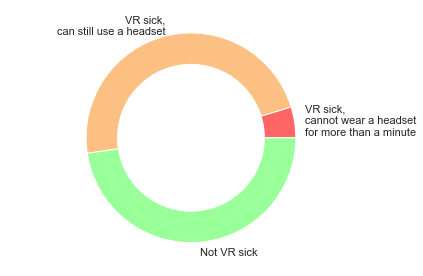

<Figure size 432x288 with 0 Axes>

In [22]:
# -VR-sick

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

out_data = [len(df[df['VR-sick'] == 'Yhard']), len(df[df['VR-sick'] == 'Yok']), len(df[df['VR-sick'] == 'N'])]
print("pie-vr-sick // outdata")
print(out_data)
pie, _ = ax.pie(
    out_data,
    radius=1, labels=filter_empty_labels(out_data, ["VR sick,\ncannot wear a headset\nfor more than a minute", "VR sick,\ncan still use a headset", "Not VR sick"]), colors=colors)
plt.setp(pie, width=width, edgecolor='white')

plt.tight_layout()

plt.show()
plt.clf()

In [23]:
# -vr-sick/Gender-
print("vr-sick-gender@@@@")
print(len(df[(df['VR-sick'] == 'Yhard') & (df['Gender'] == 'M')]))
print(len(df[(df['VR-sick'] == 'Yhard') & (df['Gender'] == 'F')]))
print(len(df[(df['VR-sick'] == 'Yok') & (df['Gender'] == 'M')]))
print(len(df[(df['VR-sick'] == 'Yok') & (df['Gender'] == 'F')]))
print(len(df[(df['VR-sick'] == 'N') & (df['Gender'] == 'M')]))
print(len(df[(df['VR-sick'] == 'N') & (df['Gender'] == 'F')]))

vr-sick-gender@@@@
1
0
3
7
8
2


pie-vr-sick-gender@@@
[10, 10, 1]
[8, 2, 0, 3, 7, 0, 1, 0, 0]


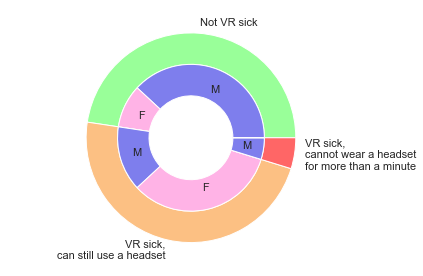

<Figure size 432x288 with 0 Axes>

In [24]:
colors = ['#99ff99', '#fcc083', '#ff6666']
colors_gender = ['#7e7eed', '#ffb3e6', '#d3d3d3', '#7e7eed', '#ffb3e6', '#d3d3d3']

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

out_data = [len(df[df['VR-sick'] == 'N']),
            len(df[df['VR-sick'] == 'Yok']),
            len(df[df['VR-sick'] == 'Yhard'])]
print("pie-vr-sick-gender@@@")
print(out_data)
pie, _ = ax.pie(
    out_data, # VR sick,\ncannot wear a headset\nfor more than a minute", "VR sick,\ncan still use a headset", "Not VR sick"
    radius=1, labels=filter_empty_labels(out_data, ["Not VR sick", "VR sick,\ncan still use a headset", "VR sick,\ncannot wear a headset\nfor more than a minute"]), colors=colors)
plt.setp(pie, width=width, edgecolor='white')

labels = ['M', 'F', 'O/U', 'M', 'F', 'O/U', 'M', 'F', 'O/U']
in_data = [len(df[(df['VR-sick'] == 'N') & (df['Gender'] == 'M')]),
           len(df[(df['VR-sick'] == 'N') & (df['Gender'] == 'F')]),
           len(df[(df['VR-sick'] == 'N') & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['VR-sick'] == 'Yok') & (df['Gender'] == 'M')]),
           len(df[(df['VR-sick'] == 'Yok') & (df['Gender'] == 'F')]),
           len(df[(df['VR-sick'] == 'Yok') & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['VR-sick'] == 'Yhard') & (df['Gender'] == 'M')]),
           len(df[(df['VR-sick'] == 'Yhard') & (df['Gender'] == 'F')]),
           len(df[(df['VR-sick'] == 'Yhard') & (df['Gender'] == 'other/unspecified')]),
           ]
print(in_data)
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.7, colors=colors_gender)
plt.setp(pie2, width=width, edgecolor='white')
plt.tight_layout()
plt.show()
plt.clf()

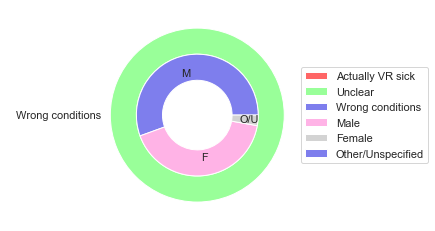

<Figure size 432x288 with 0 Axes>

In [25]:
# -vr-sick-wo-issues/Gender-
colors = ['#ff6666', '#99ff99', '#66b3ff']
colors_gender = ['#7e7eed', '#ffb3e6', '#d3d3d3', '#7e7eed', '#ffb3e6', '#d3d3d3']

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

out_data = [len(df[df['vr-sick-wo-issues'] == 1]),
           len(df[df['vr-sick-wo-issues'] == 0])]
pie, _ = ax.pie(
    out_data,
    radius=1, labels=filter_empty_labels(out_data, ["Actually VR sick", "Wrong conditions"]), colors=colors)
plt.setp(pie, width=width, edgecolor='white')

labels = ['M', 'F', 'O/U', 'M', 'F', 'O/U', 'M', 'F', 'O/U']
in_data = [len(df[(df['vr-sick-wo-issues'] == 1) & (df['Gender'] == 'M')]),
           len(df[(df['vr-sick-wo-issues'] == 1) & (df['Gender'] == 'F')]),
           len(df[(df['vr-sick-wo-issues'] == 1) & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['vr-sick-wo-issues'] == 0) & (df['Gender'] == 'M')]),
           len(df[(df['vr-sick-wo-issues'] == 0) & (df['Gender'] == 'F')]),
           len(df[(df['vr-sick-wo-issues'] == 0) & (df['Gender'] == 'other/unspecified')]),
           ]
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.7, colors=colors_gender)
plt.setp(pie2, width=width, edgecolor='white')
plt.legend(['Actually VR sick', 'Unclear', 'Wrong conditions', 'Male', 'Female', 'Other/Unspecified'], bbox_to_anchor=(.94,.5), loc='center')

plt.gcf().subplots_adjust(left=.02)
plt.show()
plt.clf()

#########activity types
[0.8055555555555556, 0.8055555555555556, 0.5277777777777778, 0.25]


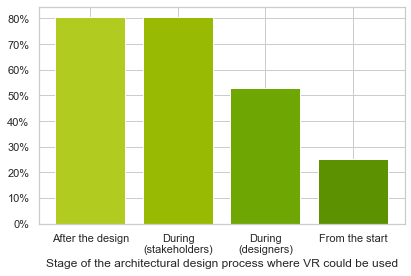

<Figure size 432x288 with 0 Axes>

In [26]:
# ---VRArchi-activities---
# -VRArchi-activities-
x = np.arange(4)
df_len = len(df)
activity_types = [df["VRArchi-activities [after]"].count()/df_len, df["VRArchi-activities [ucd]"].count()/df_len,
                  df["VRArchi-activities [check]"].count()/df_len, df["VRArchi-activities [start]"].count()/df_len]
print("#########activity types")
print(activity_types)

percent_formatter = FuncFormatter(percent_format)

sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(percent_formatter)
plt.bar(x, activity_types, color=sns.color_palette(greens))
plt.xticks(x, ('After the design', 'During\n(stakeholders)', 'During\n(designers)', 'From the start'))
plt.xlabel('Stage of the architectural design process where VR could be used')
plt.tight_layout()
plt.show()
plt.clf()

tried_vr_len = len(df[df['tried-actual-vr'] == 'Y'])
nottried_vr_len = len(df[df['tried-actual-vr'] == 'N'])

%%%%%%%%%%%%%%%%%%%%%%%%
[0.8125, 0.8125, 0.6875, 0.4375]
[0.8, 0.8, 0.4, 0.1]


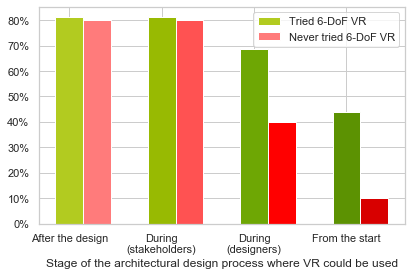

<Figure size 432x288 with 0 Axes>

In [27]:
# -VRArchi-activities/tried-actual-vr-

bar_width = 0.3
x_nottried = [p+bar_width for p in x]

activity_types_tried_vr = [len(df[(df["VRArchi-activities [after]"] == 'Y') & (df['tried-actual-vr'] == 'Y')])/tried_vr_len,
                  len(df[(df["VRArchi-activities [ucd]"] == 'Y') & (df['tried-actual-vr'] == 'Y')])/tried_vr_len,
                  len(df[(df["VRArchi-activities [check]"] == 'Y') & (df['tried-actual-vr'] == 'Y')])/tried_vr_len,
                  len(df[(df["VRArchi-activities [start]"] == 'Y') & (df['tried-actual-vr'] == 'Y')])/tried_vr_len,]
activity_types_nottried_vr = [len(df[(df["VRArchi-activities [after]"] == 'Y') & (df['tried-actual-vr'] == 'N')])/nottried_vr_len,
                  len(df[(df["VRArchi-activities [ucd]"] == 'Y') & (df['tried-actual-vr'] == 'N')])/nottried_vr_len,
                  len(df[(df["VRArchi-activities [check]"] == 'Y') & (df['tried-actual-vr'] == 'N')])/nottried_vr_len,
                  len(df[(df["VRArchi-activities [start]"] == 'Y') & (df['tried-actual-vr'] == 'N')])/nottried_vr_len,]
print("%%%%%%%%%%%%%%%%%%%%%%%%")
print(activity_types_tried_vr)
print(activity_types_nottried_vr)

percent_formatter = FuncFormatter(percent_format)

sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(percent_formatter)
plt.bar(x, activity_types_tried_vr, width=bar_width, color=sns.color_palette(greens))
plt.bar(x_nottried, activity_types_nottried_vr, width=bar_width, color=sns.color_palette(reds))
plt.xticks(x, ('After the design', 'During\n(stakeholders)', 'During\n(designers)', 'From the start'))
plt.legend(['Tried 6-DoF VR', 'Never tried 6-DoF VR'],
           loc='upper right')
plt.xlabel('Stage of the architectural design process where VR could be used')
plt.tight_layout()

plt.show()
plt.clf()

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.7, 0.6, 0.3]
[0.6, 0.8, 0.6, 0.5]


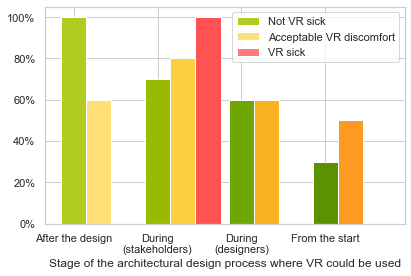

<Figure size 432x288 with 0 Axes>

In [28]:
# -VRArchi-activities/VR-sick

bar_width = 0.3
x_secondbar = [p + bar_width for p in x]
x_thirdbar = [p + 2 * bar_width for p in x]

notsick_len = len(df[df['VR-sick'] == 'N'])
sickyok_len = len(df[df['VR-sick'] == 'Yok'])
sickyhard_len = len(df[df['VR-sick'] == 'Yhard'])

activity_types_notsick = [
    len(df[(df["VRArchi-activities [after]"] == 'Y') & (df['VR-sick'] == 'N')]) / notsick_len,
    len(df[(df["VRArchi-activities [ucd]"] == 'Y') & (df['VR-sick'] == 'N')]) / notsick_len,
    len(df[(df["VRArchi-activities [check]"] == 'Y') & (df['VR-sick'] == 'N')]) / notsick_len,
    len(df[(df["VRArchi-activities [start]"] == 'Y') & (df['VR-sick'] == 'N')]) / notsick_len, ]
activity_types_sickyok = [
    len(df[(df["VRArchi-activities [after]"] == 'Y') & (df['VR-sick'] == 'Yok')]) / sickyok_len,
    len(df[(df["VRArchi-activities [ucd]"] == 'Y') & (df['VR-sick'] == 'Yok')]) / sickyok_len,
    len(df[(df["VRArchi-activities [check]"] == 'Y') & (df['VR-sick'] == 'Yok')]) / sickyok_len,
    len(df[(df["VRArchi-activities [start]"] == 'Y') & (df['VR-sick'] == 'Yok')]) / sickyok_len, ]
if sickyhard_len > 0:
    activity_types_sickyhard = [
        len(df[(df["VRArchi-activities [after]"] == 'Y') & (df['VR-sick'] == 'Yhard')]) / sickyhard_len,
        len(df[(df["VRArchi-activities [ucd]"] == 'Y') & (df['VR-sick'] == 'Yhard')]) / sickyhard_len,
        len(df[(df["VRArchi-activities [check]"] == 'Y') & (df['VR-sick'] == 'Yhard')]) / sickyhard_len,
        len(df[(df["VRArchi-activities [start]"] == 'Y') & (df['VR-sick'] == 'Yhard')]) / sickyhard_len, ]
    print(activity_types_sickyhard)
print(activity_types_notsick)
print(activity_types_sickyok)

percent_formatter = FuncFormatter(percent_format)

sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(percent_formatter)
plt.bar(x, activity_types_notsick, width=bar_width, color=sns.color_palette(greens))
plt.bar(x_secondbar, activity_types_sickyok, width=bar_width, color=sns.color_palette(oranges))
if sickyhard_len > 0:
    plt.bar(x_thirdbar, activity_types_sickyhard, width=bar_width, color=sns.color_palette(reds))
plt.xticks(x, ('After the design', 'During\n(stakeholders)', 'During\n(designers)', 'From the start'))
plt.legend(['Not VR sick', 'Acceptable VR discomfort', 'VR sick'],
           loc='upper right')
plt.xlabel('Stage of the architectural design process where VR could be used')
plt.tight_layout()
plt.show()

plt.clf()

pie-archi-profile-gender // indata
[1, 0, 1, 6, 5, 0, 7, 4, 0, 6, 6, 0]


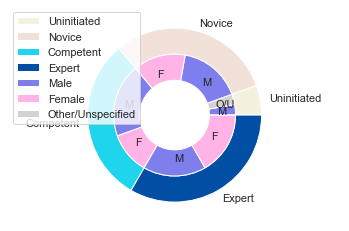

<Figure size 432x288 with 0 Axes>

In [29]:
# -pie-archi-profile-gender

colors = ['#f4f1de', '#f2e1d8', '#1fd5ed', '#004fa4']
colors_gender = ['#7e7eed', '#ffb3e6', '#d3d3d3', '#7e7eed', '#ffb3e6', '#d3d3d3', '#7e7eed', '#ffb3e6', '#d3d3d3', '#7e7eed', '#ffb3e6', '#d3d3d3']

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

pie, _ = ax.pie(
    [len(df[df['archi-profile'] == 0]), len(df[df['archi-profile'] == 1]), len(df[df['archi-profile'] == 2]), len(df[df['archi-profile'] == 3])],
    radius=1, labels=["Uninitiated", "Novice", "Competent", "Expert"], colors=colors)
plt.setp(pie, width=width, edgecolor='white')

labels = ['M', 'F', 'O/U', 'M', 'F', 'O/U', 'M', 'F', 'O/U', 'M', 'F', 'O/U']
in_data = [len(df[(df['archi-profile'] == 0) & (df['Gender'] == 'M')]),
           len(df[(df['archi-profile'] == 0) & (df['Gender'] == 'F')]),
           len(df[(df['archi-profile'] == 0) & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['archi-profile'] == 1) & (df['Gender'] == 'M')]),
           len(df[(df['archi-profile'] == 1) & (df['Gender'] == 'F')]),
           len(df[(df['archi-profile'] == 1) & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['archi-profile'] == 2) & (df['Gender'] == 'M')]),
           len(df[(df['archi-profile'] == 2) & (df['Gender'] == 'F')]),
           len(df[(df['archi-profile'] == 2) & (df['Gender'] == 'other/unspecified')]),
           len(df[(df['archi-profile'] == 3) & (df['Gender'] == 'M')]),
           len(df[(df['archi-profile'] == 3) & (df['Gender'] == 'F')]),
           len(df[(df['archi-profile'] == 3) & (df['Gender'] == 'other/unspecified')]),
           ]
print("pie-archi-profile-gender // indata")
print(in_data)
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.7, colors=colors_gender)
plt.setp(pie2, width=width, edgecolor='white')
plt.legend(['Uninitiated', 'Novice', 'Competent', 'Expert', 'Male', 'Female', 'Other/Unspecified'], loc='upper left')
plt.show()
plt.clf()

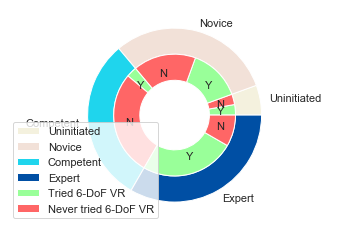

<Figure size 432x288 with 0 Axes>

In [30]:
# -pie-archi-profile-tried-actual-vr

colors = ['#f4f1de', '#f2e1d8', '#1fd5ed', '#004fa4']
colors_yes_no_4 = ['#99ff99', '#ff6666', '#99ff99', '#ff6666', '#99ff99', '#ff6666', '#99ff99', '#ff6666']

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

pie, _ = ax.pie(
    [len(df[df['archi-profile'] == 0]), len(df[df['archi-profile'] == 1]), len(df[df['archi-profile'] == 2]), len(df[df['archi-profile'] == 3])],
    radius=1, labels=["Uninitiated", "Novice", "Competent", "Expert"], colors=colors)
plt.setp(pie, width=width, edgecolor='white')

labels = ['Y', 'N', 'Y', 'N','Y', 'N','Y', 'N']
in_data = [len(df[(df['archi-profile'] == 0) & (df['tried-actual-vr'] == 'Y')]),
           len(df[(df['archi-profile'] == 0) & (df['tried-actual-vr'] == 'N')]),
           len(df[(df['archi-profile'] == 1) & (df['tried-actual-vr'] == 'Y')]),
           len(df[(df['archi-profile'] == 1) & (df['tried-actual-vr'] == 'N')]),
           len(df[(df['archi-profile'] == 2) & (df['tried-actual-vr'] == 'Y')]),
           len(df[(df['archi-profile'] == 2) & (df['tried-actual-vr'] == 'N')]),
           len(df[(df['archi-profile'] == 3) & (df['tried-actual-vr'] == 'Y')]),
           len(df[(df['archi-profile'] == 3) & (df['tried-actual-vr'] == 'N')]),
           ]
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.7, colors=colors_yes_no_4)
plt.setp(pie2, width=width, edgecolor='white')
plt.legend(['Uninitiated', 'Novice', 'Competent', 'Expert', 'Tried 6-DoF VR', 'Never tried 6-DoF VR'], loc='lower left')
plt.show()
plt.clf()


####pie-VRArchi-used
[4, 10, 11]


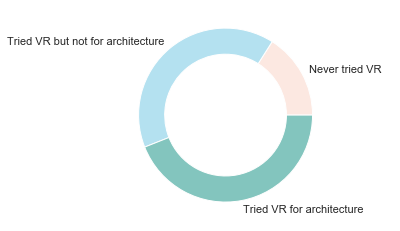

<Figure size 432x288 with 0 Axes>

In [31]:
# -pie-vr-archi-used-better-with-freq-never
# TODO: should we also filter to include only archi-profile >0 ?


colors_no_notreally_yes2 = ['#fce8e1', '#b4e1f0', '#83c5be']

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

out_data = [len(df[df['VR-freq'] == 'never']), len(df[(df['VR-freq'] != "never") & (df['VRArchi-used'] == 'N')]),
            len(df[(df['VR-freq'] != "never") & (df['VRArchi-used'] == 'Y')])]
print("####pie-VRArchi-used")
print(out_data)
pie, _ = ax.pie(
    out_data,
    radius=1, labels=filter_empty_labels(out_data, ["Never tried VR", "Tried VR but not for architecture",
                                                "Tried VR for architecture"]), colors=colors_no_notreally_yes2)
plt.setp(pie, width=width, edgecolor='white')

plt.show()
plt.clf()

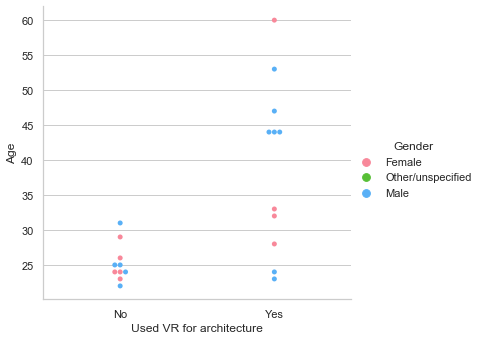

<Figure size 432x288 with 0 Axes>

In [32]:
# -swarm-VRArchi-used-age-gender

sns.set_palette("tab10", 2)
g = sns.catplot(x="VRArchi-used", y="Age", kind="swarm", hue="Gender", data=df)

plt.xlabel('Used VR for architecture')
g.set_xticklabels(['No', 'Yes'])
new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
plt.clf()

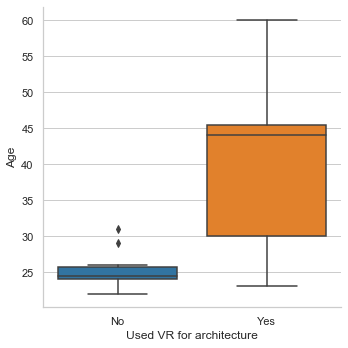

<Figure size 432x288 with 0 Axes>

In [33]:
# -box-VRArchi-used-age

sns.set_palette("tab10", 2)
g = sns.catplot(x="VRArchi-used", y="Age", kind="box", data=df)

plt.xlabel('Used VR for architecture')
g.set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()
plt.clf()

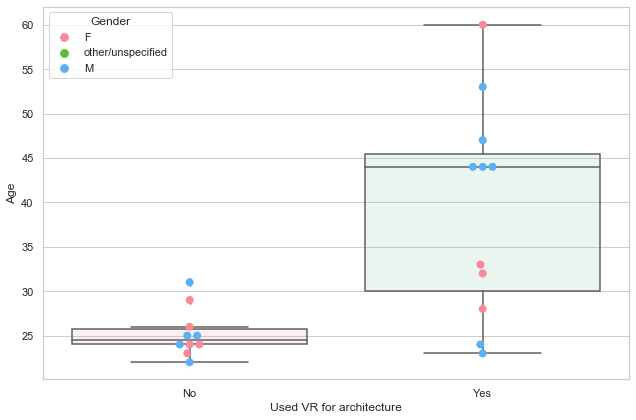

<Figure size 432x288 with 0 Axes>

In [34]:
#-combined-swarm-and-box-VRArchi-used
plt.figure(1, figsize=(9, 6))
sns.set_palette(["#f28482", "#74c69d"])

g = sns.swarmplot(x="VRArchi-used", y="Age", hue="Gender", data=df, size=8)
ax = sns.boxplot(x="VRArchi-used", y="Age", data=df)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .15))

plt.xlabel('Used VR for architecture')
ax.set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()
plt.clf()

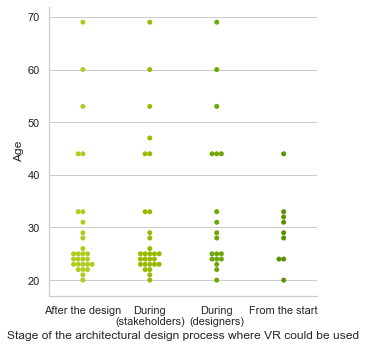

<Figure size 432x288 with 0 Axes>

In [35]:
# -swarm-VRArchi-activities-age
sns.set_palette(greens)

dftest = df[['Age','VRArchi-activities [after]', 'VRArchi-activities [ucd]', 'VRArchi-activities [check]', 'VRArchi-activities [start]']].melt(id_vars='Age', var_name='Use of VR for architecture').dropna()
sns.catplot(x='Use of VR for architecture', y='Age', kind='swarm', data=dftest)
plt.xticks(x, ('After the design', 'During\n(stakeholders)', 'During\n(designers)', 'From the start'))
plt.xlabel('Stage of the architectural design process where VR could be used')
plt.tight_layout()
plt.show()
plt.clf()

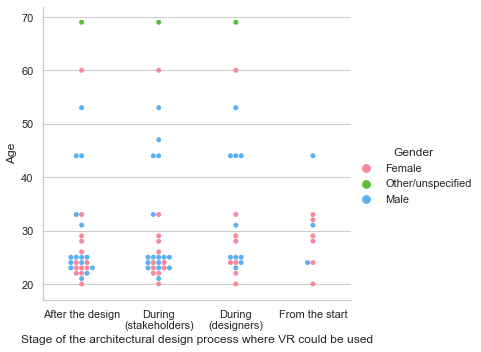

<Figure size 432x288 with 0 Axes>

In [36]:
# -swarm-VRArchi-activities-age-gender
sns.set_palette("tab10", 2)

dftest = df[['Age', 'Gender', 'VRArchi-activities [after]', 'VRArchi-activities [ucd]', 'VRArchi-activities [check]', 'VRArchi-activities [start]']].melt(id_vars=['Age','Gender'], var_name='Use of VR for architecture').dropna()
g = sns.catplot(x='Use of VR for architecture', y='Age', kind='swarm', hue='Gender', data=dftest)
plt.xticks(x, ('After the design', 'During\n(stakeholders)', 'During\n(designers)', 'From the start'))
plt.xlabel('Stage of the architectural design process where VR could be used')

new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
plt.clf()

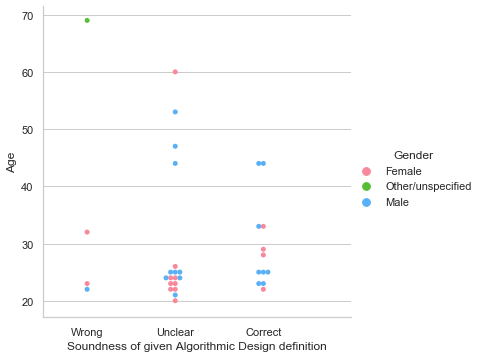

<Figure size 432x288 with 0 Axes>

In [37]:
# -swarm-pm-def-valid-age-gender

sns.set_palette("tab10", 2)
g = sns.catplot(x="pm-def-valid", y="Age", kind="swarm", hue="Gender", data=df_pm_aware)

plt.xlabel('Soundness of given Algorithmic Design definition')
plt.xticks(x, ('Wrong', 'Unclear', 'Correct'))

new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.gcf().subplots_adjust(bottom=0.1)

plt.show()

plt.clf()

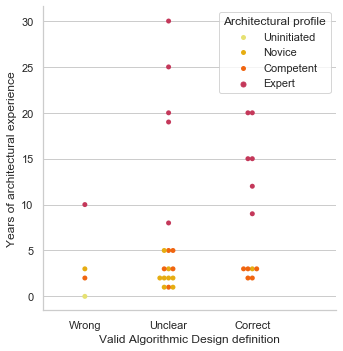

<Figure size 432x288 with 0 Axes>

In [38]:
# -swarm-pm-def-valid-xp-gender

sns.set_palette("CMRmap_r")
sns.catplot(x="pm-def-valid", y="XP", kind="swarm", hue="archi-profile", data=df_pm_aware, legend=False)

plt.xlabel('Valid Algorithmic Design definition')
plt.xticks(x, ('Wrong', 'Unclear', 'Correct'))
plt.ylabel('Years of architectural experience')
plt.legend(title='Architectural profile', labels=['Uninitiated', 'Novice', 'Competent', 'Expert'],loc='upper right')

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(sns.color_palette("CMRmap_r")[0])
leg.legendHandles[1].set_color(sns.color_palette("CMRmap_r")[1])
leg.legendHandles[2].set_color(sns.color_palette("CMRmap_r")[2])
leg.legendHandles[3].set_color(sns.color_palette("CMRmap_r")[3])
leg.legendHandles[3]._sizes=leg.legendHandles[1]._sizes
plt.gcf().subplots_adjust(bottom=0.12, left=.15)

plt.show()
plt.clf()

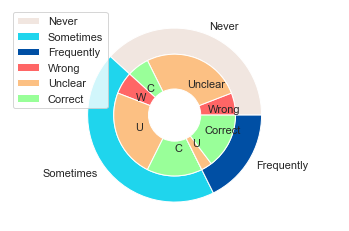

<Figure size 432x288 with 0 Axes>

In [39]:
# -PM-freq-pm-def-valid-
colors_def = ['#ff6666', '#fcc083', '#99ff99']
colors_freq = ['#f1e6e0', '#1fd5ed', '#004fa4']

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

pie, _ = ax.pie(
    [len(df[df['PM-freq'] == 'never']), len(df[df['PM-freq'] == 'some']), len(df[df['PM-freq'] == 'freq'])],
    radius=1, labels=["Never", "Sometimes", "Frequently"], colors=colors_freq)
plt.setp(pie, width=width, edgecolor='white')

labels = ['Wrong', 'Unclear', 'C','W', 'U', 'C','W', 'U', 'Correct']
in_data = [len(df[(df['PM-freq'] == 'never') & (df['pm-def-valid'] == 0)]),
           len(df[(df['PM-freq'] == 'never') & (df['pm-def-valid'] == 1)]),
           len(df[(df['PM-freq'] == 'never') & (df['pm-def-valid'] == 2)]),
           len(df[(df['PM-freq'] == 'some') & (df['pm-def-valid'] == 0)]),
           len(df[(df['PM-freq'] == 'some') & (df['pm-def-valid'] == 1)]),
           len(df[(df['PM-freq'] == 'some') & (df['pm-def-valid'] == 2)]),
           len(df[(df['PM-freq'] == 'freq') & (df['pm-def-valid'] == 0)]),
           len(df[(df['PM-freq'] == 'freq') & (df['pm-def-valid'] == 1)]),
           len(df[(df['PM-freq'] == 'freq') & (df['pm-def-valid'] == 2)]),
           ]
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.55, colors=colors_def)
plt.setp(pie2, width=width+.1, edgecolor='white')
plt.legend(['Never', 'Sometimes', 'Frequently', 'Wrong', 'Unclear', 'Correct'], loc='upper left')
plt.show()
plt.clf()

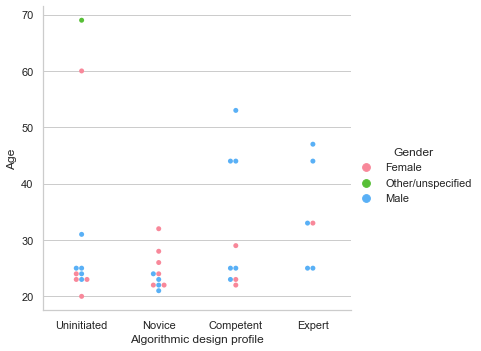

<Figure size 432x288 with 0 Axes>

In [40]:
# -swarm-pm-profile-age-gender-

sns.set_palette("tab10", 2)
g = sns.catplot(x="pm-profile", y="Age", kind="swarm", hue="Gender",
                data=df)

plt.xticks(x, ('Uninitiated', 'Novice', 'Competent', 'Expert'))
plt.xlabel('Algorithmic design profile')
new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.gcf().subplots_adjust(bottom=0.12)

plt.show()
plt.clf()

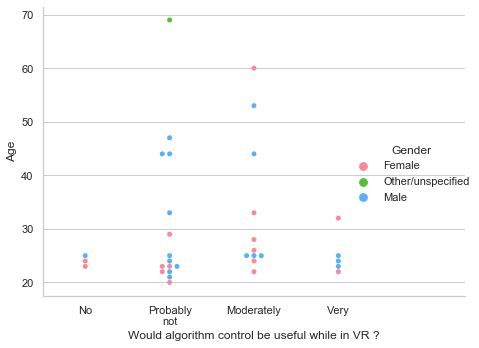

<Figure size 432x288 with 0 Axes>

In [41]:
# -swarm-VRPM-useful-age-gender-

sns.set_palette("tab10", 2)
g = sns.catplot(x="VRPM-useful", y="Age", kind="swarm", order=["N", "probN", "modY", "veryY", "xtrmY"], hue="Gender",
                data=df)

plt.xticks(x, ('No', 'Probably\nnot', 'Moderately', 'Very', 'Extremely'))
plt.xlabel('Would algorithm control be useful while in VR ?')

new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.tight_layout()
plt.show()
plt.clf()

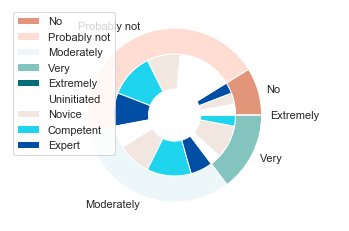

<Figure size 432x288 with 0 Axes>

In [42]:
# -VRPM-useful-pm-profile-
colors_useful_5 = ['#e29578', '#ffddd2', '#edf6f9', '#83c5be', '#006d77']
colors_pm_profile = ['#ffffff', '#f1e6e0', '#1fd5ed', '#004fa4']


fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

pie, _ = ax.pie(
    [len(df[df['VRPM-useful'] == 'N']), len(df[df['VRPM-useful'] == 'probN']), len(df[df['VRPM-useful'] == 'modY']), len(df[df['VRPM-useful'] == 'veryY']), len(df[df['VRPM-useful'] == 'xtrmY'])],
    radius=1, labels=["No", "Probably not", "Moderately", "Very", "Extremely"], colors=colors_useful_5)
plt.setp(pie, width=width, edgecolor='white')

labels = ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
in_data = [len(df[(df['VRPM-useful'] == 'N') & (df['pm-profile'] == 0)]),
           len(df[(df['VRPM-useful'] == 'N') & (df['pm-profile'] == 1)]),
           len(df[(df['VRPM-useful'] == 'N') & (df['pm-profile'] == 2)]),
           len(df[(df['VRPM-useful'] == 'N') & (df['pm-profile'] == 3)]),
           len(df[(df['VRPM-useful'] == 'probN') & (df['pm-profile'] == 0)]),
           len(df[(df['VRPM-useful'] == 'probN') & (df['pm-profile'] == 1)]),
           len(df[(df['VRPM-useful'] == 'probN') & (df['pm-profile'] == 2)]),
           len(df[(df['VRPM-useful'] == 'probN') & (df['pm-profile'] == 3)]),
           len(df[(df['VRPM-useful'] == 'modY') & (df['pm-profile'] == 0)]),
           len(df[(df['VRPM-useful'] == 'modY') & (df['pm-profile'] == 1)]),
           len(df[(df['VRPM-useful'] == 'modY') & (df['pm-profile'] == 2)]),
           len(df[(df['VRPM-useful'] == 'modY') & (df['pm-profile'] == 3)]),
           len(df[(df['VRPM-useful'] == 'veryY') & (df['pm-profile'] == 0)]),
           len(df[(df['VRPM-useful'] == 'veryY') & (df['pm-profile'] == 1)]),
           len(df[(df['VRPM-useful'] == 'veryY') & (df['pm-profile'] == 2)]),
           len(df[(df['VRPM-useful'] == 'veryY') & (df['pm-profile'] == 3)]),
           len(df[(df['VRPM-useful'] == 'xtrmY') & (df['pm-profile'] == 0)]),
           len(df[(df['VRPM-useful'] == 'xtrmY') & (df['pm-profile'] == 1)]),
           len(df[(df['VRPM-useful'] == 'xtrmY') & (df['pm-profile'] == 2)]),
           len(df[(df['VRPM-useful'] == 'xtrmY') & (df['pm-profile'] == 3)]),
           ]
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.55, colors=colors_pm_profile)
plt.setp(pie2, width=width + .1, edgecolor='white')
plt.legend(['No', 'Probably not', 'Moderately', 'Very', 'Extremely', 'Uninitiated', 'Novice', 'Competent', 'Expert'], loc='upper left')
plt.show()
plt.clf()

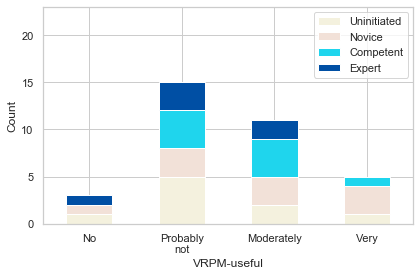

<Figure size 432x288 with 0 Axes>

In [43]:
# -VRPM-useful-pm-profile- stacked-barplot

sns.set_palette(sns.color_palette(['#f4f1de', '#f2e1d8', '#1fd5ed', '#004fa4']))
df_pm_filtered = df.dropna(subset=['VRPM-useful'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'pm-profile']]

orderedX = ['N', 'probN', 'modY', 'veryY']  # , 'xtrmY'] #todo: add this one back if necessary
stack_categories = [0,1,2,3]

df_pm_filtered = df_pm_filtered.groupby('VRPM-useful')['pm-profile'].value_counts(dropna=False)

test = pd.Series([0], index=[('N', 2)])
test2 = pd.Series([0], index=[('veryY', 3)])
# todo: add other empty rows if needed or remove this one if not needed anymore
df_pm_filtered = df_pm_filtered.append(test)
df_pm_filtered = df_pm_filtered.append(test2)


df_pm_filtered = df_pm_filtered.groupby('VRPM-useful').transform(lambda x: x)
df_pm_filtered = df_pm_filtered.unstack()

df_pm_filtered.columns = pd.CategoricalIndex(df_pm_filtered.columns.values,
                                             ordered=True,
                                             categories=stack_categories)

df_pm_filtered = df_pm_filtered.sort_index(axis=1)

ax = df_pm_filtered.loc[orderedX].plot.bar(stacked=True, rot=0)
ax.set_ylim(ymax=23)
plt.ylabel("Count")
plt.xticks(x, ('No', 'Probably\nnot', 'Moderately', 'Very'))
plt.legend(['Uninitiated', 'Novice', 'Competent', 'Expert'])
plt.tight_layout()

plt.show()
plt.clf()

pie-VRPM-useful
[3, 15, 11, 5, 0]


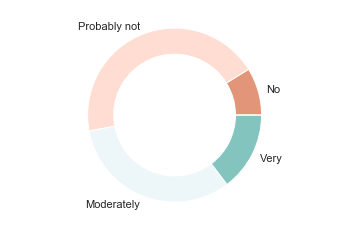

<Figure size 432x288 with 0 Axes>

In [44]:
# -pie-VRPM-useful-

fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

out_data = [len(df[df['VRPM-useful'] == 'N']), len(df[df['VRPM-useful'] == 'probN']), len(df[df['VRPM-useful'] == 'modY']), len(df[df['VRPM-useful'] == 'veryY']), len(df[df['VRPM-useful'] == 'xtrmY'])]
print("pie-VRPM-useful")
print(out_data)
pie, _ = ax.pie(
    out_data,
    radius=1,
    labels=filter_empty_labels(out_data, ["No", "Probably not", "Moderately", "Very", "Extremely"]),
    colors=colors_useful_5)
plt.setp(pie, width=width, edgecolor='white')

plt.show()
plt.clf()

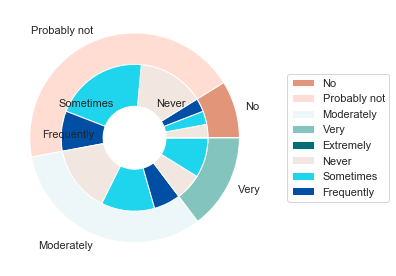

<Figure size 432x288 with 0 Axes>

In [45]:
# -VRPM-useful-PM-freq-
colors_useful_5 = ['#e29578', '#ffddd2', '#edf6f9', '#83c5be', '#006d77']


fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

pie, _ = ax.pie(
    [len(df[df['VRPM-useful'] == 'N']), len(df[df['VRPM-useful'] == 'probN']), len(df[df['VRPM-useful'] == 'modY']), len(df[df['VRPM-useful'] == 'veryY']), len(df[df['VRPM-useful'] == 'xtrmY'])],
    radius=1, labels=["No", "Probably not", "Moderately", "Very", ""], colors=colors_useful_5)
plt.setp(pie, width=width, edgecolor='white')

labels = ['', '', '', 'Never', 'Sometimes', 'Frequently', '', '', '', '', '', '', '', '', '']
in_data = [len(df[(df['VRPM-useful'] == 'N') & (df['PM-freq'] == 'never')]),
           len(df[(df['VRPM-useful'] == 'N') & (df['PM-freq'] == 'some')]),
           len(df[(df['VRPM-useful'] == 'N') & (df['PM-freq'] == 'freq')]),
           len(df[(df['VRPM-useful'] == 'probN') & (df['PM-freq'] == 'never')]),
           len(df[(df['VRPM-useful'] == 'probN') & (df['PM-freq'] == 'some')]),
           len(df[(df['VRPM-useful'] == 'probN') & (df['PM-freq'] == 'freq')]),
           len(df[(df['VRPM-useful'] == 'modY') & (df['PM-freq'] == 'never')]),
           len(df[(df['VRPM-useful'] == 'modY') & (df['PM-freq'] == 'some')]),
           len(df[(df['VRPM-useful'] == 'modY') & (df['PM-freq'] == 'freq')]),
           len(df[(df['VRPM-useful'] == 'veryY') & (df['PM-freq'] == 'never')]),
           len(df[(df['VRPM-useful'] == 'veryY') & (df['PM-freq'] == 'some')]),
           len(df[(df['VRPM-useful'] == 'veryY') & (df['PM-freq'] == 'freq')]),
           len(df[(df['VRPM-useful'] == 'xtrmY') & (df['PM-freq'] == 'never')]),
           len(df[(df['VRPM-useful'] == 'xtrmY') & (df['PM-freq'] == 'some')]),
           len(df[(df['VRPM-useful'] == 'xtrmY') & (df['PM-freq'] == 'freq')]),
           ]
labels = filter_empty_labels(in_data, labels)
pie2, _ = ax.pie(in_data, radius=1 - width, labels=labels,
                 labeldistance=0.55, colors=colors_freq)
plt.setp(pie2, width=width + .1, edgecolor='white')
plt.legend(['No', 'Probably not', 'Moderately', 'Very', 'Extremely', 'Never', 'Sometimes', 'Frequently'],bbox_to_anchor=(1.3,.5), loc='center')
plt.tight_layout()
plt.show()
plt.clf()

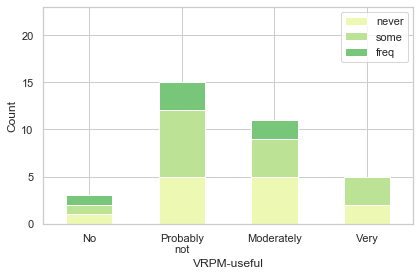

<Figure size 432x288 with 0 Axes>

In [46]:
#-VRPM-useful-PM-freq- stacked-barplot

sns.set_palette("YlGn", 5)
df_pm_filtered = df.dropna(subset=['VRPM-useful'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'PM-freq']]

orderedX = ['N', 'probN', 'modY', 'veryY']#, 'xtrmY'] #todo: add this one back if necessary
stack_categories = ['never', 'some', 'freq']

df_pm_filtered = df_pm_filtered.groupby('VRPM-useful')['PM-freq'].value_counts(dropna=False)

test = pd.Series([0], index=[('veryY', 'freq')])
#todo: add other empty rows if needed or remove this one if not needed anymore
df_pm_filtered = df_pm_filtered.append(test)

df_pm_filtered = df_pm_filtered.groupby('VRPM-useful').transform(lambda x: x)
df_pm_filtered = df_pm_filtered.unstack()

df_pm_filtered.columns = pd.CategoricalIndex(df_pm_filtered.columns.values,
                                             ordered=True,
                                             categories=stack_categories)

df_pm_filtered = df_pm_filtered.sort_index(axis=1)

ax = df_pm_filtered.loc[orderedX].plot.bar(stacked=True, rot=0)
ax.set_ylim(ymax=23)
plt.ylabel("Count")
plt.xticks(x, ('No', 'Probably\nnot', 'Moderately', 'Very'))
plt.tight_layout()

plt.show()
plt.clf()

-------------------------
   VRPM-useful VRArchi-used
0         modY            N
2         modY            Y
3         modY            Y
4        probN            N
5        probN            Y
6        probN            Y
7         modY            Y
9        veryY            Y
10       veryY            N
11        modY            Y
12       probN            Y
13       probN            N
14        modY            Y
19           N            N
24       probN            Y
27       probN            N
28        modY            N
29       probN            Y
30           N            N
32       veryY            N
VRPM-useful  VRArchi-used
N            N               2
modY         Y               5
             N               2
probN        Y               5
             N               3
veryY        N               2
             Y               1
Name: VRArchi-used, dtype: int64


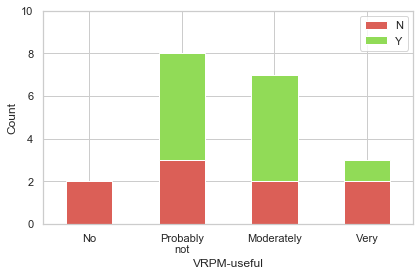

<Figure size 432x288 with 0 Axes>

In [47]:
# -VRPM-useful-VRArchi-used- stacked-barplot

sns.set_palette("hls",4)
df_pm_filtered = df.dropna(subset=['VRPM-useful', 'VRArchi-used'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'VRArchi-used']]
print("-------------------------")
print(df_pm_filtered)

orderedX = ['N', 'probN', 'modY', 'veryY']  # , 'xtrmY'] #todo: add this one back if necessary
stack_categories = ['N', 'Y']

df_pm_filtered = df_pm_filtered.groupby('VRPM-useful')['VRArchi-used'].value_counts(dropna=False)
print("====================")
print(df_pm_filtered)

df_pm_filtered = df_pm_filtered.groupby('VRPM-useful').transform(lambda x: x)
df_pm_filtered = df_pm_filtered.unstack()

df_pm_filtered.columns = pd.CategoricalIndex(df_pm_filtered.columns.values,
                                             ordered=True,
                                             categories=stack_categories)

df_pm_filtered = df_pm_filtered.sort_index(axis=1)

ax = df_pm_filtered.loc[orderedX].plot.bar(stacked=True, rot=0)
ax.set_ylim(ymax=10)
plt.ylabel("Count")
plt.xticks(x, ('No', 'Probably\nnot', 'Moderately', 'Very'))
plt.tight_layout()

plt.show()
plt.clf()

@@@@@@@@@@
VRArchi-used    N    Y
VRPM-useful           
N             2.0  NaN
modY          2.0  5.0
probN         3.0  5.0
veryY         2.0  1.0


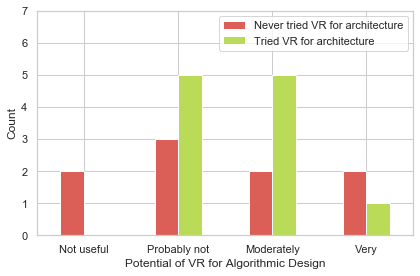

<Figure size 432x288 with 0 Axes>

In [48]:
# -VRPM-useful-VRArchi-used- barplots side to side
sns.set_palette("hls", 5)
df_vrarchi_used = df.dropna(subset=['VRPM-useful'])
df_vrarchi_used = df_vrarchi_used[['VRPM-useful', 'VRArchi-used']]

orderedX = ['N', 'probN', 'modY', 'veryY']  # , 'xtrmY'] #todo: add this one back if necessary
stack_categories = ['N', 'Y']

df_vrarchi_used = df_vrarchi_used.groupby('VRPM-useful')['VRArchi-used'].value_counts(
dropna=True)

df_vrarchi_used = df_vrarchi_used.groupby('VRArchi-used').transform(lambda x: x)
df_vrarchi_used = df_vrarchi_used.unstack()
print("@@@@@@@@@@")
print(df_vrarchi_used)

df_vrarchi_used.columns = pd.CategoricalIndex(df_vrarchi_used.columns.values,
                                               ordered=True,
                                               categories=stack_categories)

df_vrarchi_used = df_vrarchi_used.sort_index(axis=1)

ax = df_vrarchi_used.loc[orderedX].plot.bar(stacked=False, rot=0)
ax.set_ylim(ymax=7)
plt.ylabel("Count")
plt.xlabel("Potential of VR for Algorithmic Design")
plt.legend(['Never tried VR for architecture', 'Tried VR for architecture'])
plt.xticks(np.arange(4), ('Not useful', 'Probably not', 'Moderately', 'Very'))
plt.tight_layout()

plt.show()
plt.clf()

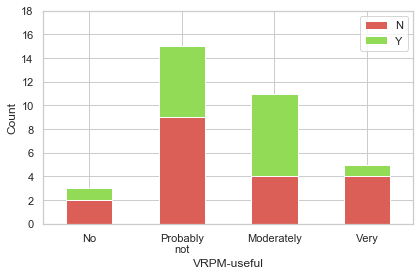

<Figure size 432x288 with 0 Axes>

In [49]:
#-VRPM-useful-tried-actual-vr- stacked-barplot

sns.set_palette("hls", 4)
df_pm_filtered = df.dropna(subset=['VRPM-useful', 'tried-actual-vr'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'tried-actual-vr']]

orderedX = ['N', 'probN', 'modY', 'veryY']  # , 'xtrmY'] #todo: add this one back if necessary
stack_categories = ['N', 'Y']

df_pm_filtered = df_pm_filtered.groupby('VRPM-useful')['tried-actual-vr'].value_counts(dropna=False)

df_pm_filtered = df_pm_filtered.groupby('VRPM-useful').transform(lambda x: x)
df_pm_filtered = df_pm_filtered.unstack()

df_pm_filtered.columns = pd.CategoricalIndex(df_pm_filtered.columns.values,
                                             ordered=True,
                                             categories=stack_categories)

df_pm_filtered = df_pm_filtered.sort_index(axis=1)

ax = df_pm_filtered.loc[orderedX].plot.bar(stacked=True, rot=0)
ax.set_ylim(ymax=18)
plt.ylabel("Count")
plt.xticks(x, ('No', 'Probably\nnot', 'Moderately', 'Very'))
plt.tight_layout()

plt.show()
plt.clf()

@@@@@@@@@@
tried-actual-vr  N  Y
VRPM-useful          
N                2  1
modY             4  7
probN            9  6
veryY            4  1


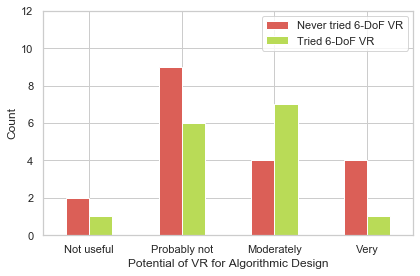

<Figure size 432x288 with 0 Axes>

In [50]:
# -VRPM-useful-tried-actual-vr- barplots side to side
sns.set_palette("hls", 5)
df_tried_vr_filtered = df.dropna(subset=['VRPM-useful'])
df_tried_vr_filtered = df_tried_vr_filtered[['VRPM-useful', 'tried-actual-vr']]

orderedX = ['N', 'probN', 'modY', 'veryY']  # , 'xtrmY'] #todo: add this one back if necessary
stack_categories = ['N', 'Y']

df_tried_vr_filtered = df_tried_vr_filtered.groupby('VRPM-useful')['tried-actual-vr'].value_counts(dropna=False)

df_tried_vr_filtered = df_tried_vr_filtered.groupby('tried-actual-vr').transform(lambda x: x)
df_tried_vr_filtered = df_tried_vr_filtered.unstack()
print("@@@@@@@@@@")
print(df_tried_vr_filtered)

df_tried_vr_filtered.columns = pd.CategoricalIndex(df_tried_vr_filtered.columns.values,
                                                   ordered=True,
                                                   categories=stack_categories)

df_tried_vr_filtered = df_tried_vr_filtered.sort_index(axis=1)

ax = df_tried_vr_filtered.loc[orderedX].plot.bar(stacked=False, rot=0)
ax.set_ylim(ymax=12)
plt.ylabel("Count")
plt.xlabel("Potential of VR for Algorithmic Design")
plt.legend(['Never tried 6-DoF VR', 'Tried 6-DoF VR'])
plt.xticks(np.arange(4), ('Not useful', 'Probably not', 'Moderately', 'Very'))
plt.tight_layout()

plt.show()
plt.clf()

#########heatmap
tried-actual-vr  N  Y
VRPM-useful          
veryY            4  1
modY             4  7
probN            9  6
N                2  1


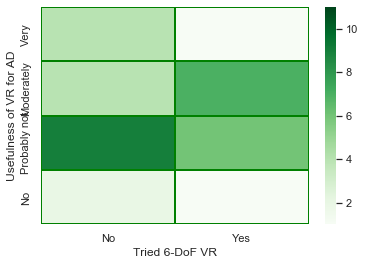

<Figure size 432x288 with 0 Axes>

In [51]:
#VRPM-useful-tried-actual-vr heatmap
print("#########heatmap")

df_pm_filtered = df.dropna(subset=['VRPM-useful', 'tried-actual-vr'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'tried-actual-vr']]
p = df_pm_filtered.pivot_table(index='VRPM-useful', columns='tried-actual-vr', aggfunc='size', fill_value=0)
p.index = pd.CategoricalIndex(p.index, categories=["veryY", "modY", "probN", "N"])
p.sort_index(level=0, inplace=True)
print(p)
sns.heatmap(p, cmap='Greens', vmax=11, linewidths=1, linecolor='green')
plt.xlabel("Tried 6-DoF VR")
plt.ylabel("Usefulness of VR for AD")
xticks = plt.gca().get_xticks()
plt.xticks(xticks, ('No', 'Yes'))
yticks = plt.gca().get_yticks()
plt.yticks(yticks, ('Very', 'Moderately', 'Probably not', 'No'),  va="center")

plt.show()
plt.clf()

#########heatmap
VRArchi-used  N  Y
VRPM-useful       
veryY         2  1
modY          2  5
probN         3  5
N             2  0


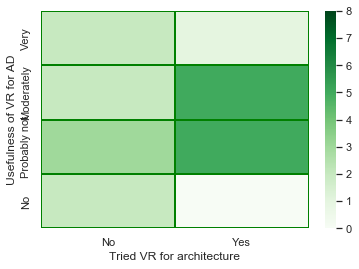

<Figure size 432x288 with 0 Axes>

In [52]:
# VRPM-useful-VRArchi-used heatmap
print("#########heatmap")

df_pm_filtered = df.dropna(subset=['VRPM-useful', 'VRArchi-used'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'VRArchi-used']]
p = df_pm_filtered.pivot_table(index='VRPM-useful', columns='VRArchi-used', aggfunc='size', fill_value=0)
p.index = pd.CategoricalIndex(p.index, categories=["veryY", "modY", "probN", "N"])
p.sort_index(level=0, inplace=True)
print(p)
sns.heatmap(p, cmap='Greens', vmax=8, linewidths=1, linecolor='green')
plt.xlabel("Tried VR for architecture")
plt.ylabel("Usefulness of VR for AD")
xticks = plt.gca().get_xticks()
plt.xticks(xticks, ('No', 'Yes'))
yticks = plt.gca().get_yticks()
plt.yticks(yticks, ('Very', 'Moderately', 'Probably not', 'No'), va="center")

plt.show()
plt.clf()

-------------------------
   VRPM-useful VRArchi-used
2         modY            Y
3         modY            Y
5        probN            Y
6        probN            Y
7         modY            Y
9        veryY            Y
11        modY            Y
12       probN            Y
14        modY            Y
24       probN            Y
29       probN            Y


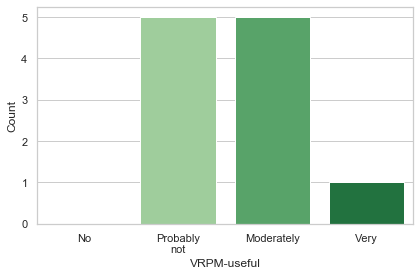

<Figure size 432x288 with 0 Axes>

In [53]:
# -VRPM-useful-VRArchi-used-Y-only

sns.set_palette("Greens",4)
df_pm_filtered = df.dropna(subset=['VRPM-useful', 'VRArchi-used'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'VRArchi-used']]
df_pm_filtered = df_pm_filtered[df_pm_filtered['VRArchi-used']=='Y']
print("-------------------------")
print(df_pm_filtered)

orderedX = ['N', 'probN', 'modY', 'veryY']  # , 'xtrmY'] #todo: add this one back if necessary

sns.countplot(x='VRPM-useful', data=df_pm_filtered, order=orderedX)
plt.ylabel("Count")
plt.xticks(x, ('No', 'Probably\nnot', 'Moderately', 'Very'))
plt.tight_layout()

plt.show()
plt.clf()

In [54]:
# Mann–Whitney U test (
# (2 "conditions", here yes or no for VRArchi-used) 
# AND 
# (between subjects i.e. independant samples i.e. not the same people in both sets))
df_pm_filtered = df.dropna(subset=['VRPM-useful', 'VRArchi-used'])

useful_mapping = {'N':1, 'probN':2, 'modY':3, 'veryY':4, 'xtrmY':5}
df_mwu_archiused_y = df_pm_filtered[df_pm_filtered["VRArchi-used"] == "Y"]
df_mwu_archiused_y = df_mwu_archiused_y.replace({'VRPM-useful': useful_mapping})
print(df_mwu_archiused_y["VRPM-useful"])
print(df_mwu_archiused_y["VRPM-useful"].mean())
print(df_mwu_archiused_y["VRPM-useful"].median())
print("########")
df_mwu_archiused_n = df_pm_filtered[df_pm_filtered["VRArchi-used"] == "N"]
df_mwu_archiused_n = df_mwu_archiused_n.replace({'VRPM-useful': useful_mapping})
print(df_mwu_archiused_n["VRPM-useful"])
print(df_mwu_archiused_n["VRPM-useful"].mean())
print(df_mwu_archiused_n["VRPM-useful"].median())
stat, p = mannwhitneyu(df_mwu_archiused_y["VRPM-useful"], df_mwu_archiused_n["VRPM-useful"])

print(stat) # 43.5
print(p) # 0.3289975686110904
# A Mann-Whitney test indicated that the difference between the two populations was not statistically significant,
# U(N_vrarchi-used=X, N_not-vrarchi-used=Y)=43.5, p > 0.05.

2     3
3     3
5     2
6     2
7     3
9     4
11    3
12    2
14    3
24    2
29    2
Name: VRPM-useful, dtype: object
2.6363636363636362
3.0
########
0     3
4     2
10    4
13    2
19    1
27    2
28    3
30    1
32    4
Name: VRPM-useful, dtype: object
2.4444444444444446
2.0
43.5
0.3289975686110904


-------------------------
   VRPM-useful tried-actual-vr
0         modY               Y
2         modY               Y
3         modY               Y
4        probN               Y
5        probN               Y
7         modY               Y
11        modY               Y
12       probN               Y
13       probN               Y
14        modY               Y
27       probN               Y
28        modY               Y
29       probN               Y
30           N               Y
32       veryY               Y


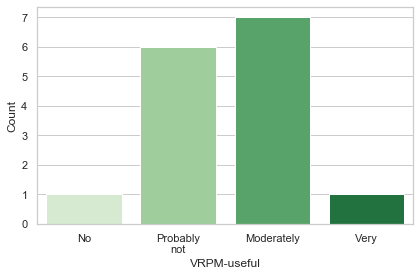

<Figure size 432x288 with 0 Axes>

In [55]:
# -VRPM-useful-tried-actual-vr-Y-only

sns.set_palette("Greens", 4)
df_pm_filtered = df.dropna(subset=['VRPM-useful', 'tried-actual-vr'])
df_pm_filtered = df_pm_filtered[['VRPM-useful', 'tried-actual-vr']]
df_pm_filtered = df_pm_filtered[df_pm_filtered['tried-actual-vr'] == 'Y']
print("-------------------------")
print(df_pm_filtered)

orderedX = ['N', 'probN', 'modY', 'veryY']  # , 'xtrmY'] #todo: add this one back if necessary

sns.countplot(x='VRPM-useful', data=df_pm_filtered, order=orderedX)
plt.ylabel("Count")
plt.xticks(x, ('No', 'Probably\nnot', 'Moderately', 'Very'))
plt.tight_layout()

plt.show()
plt.clf()

In [56]:
# Mann–Whitney U test (
# (2 "conditions", here yes or no for tried-actual-vr) 
# AND 
# (between subjects i.e. independant samples i.e. not the same people in both sets))
df_pm_filtered = df.dropna(subset=['VRPM-useful', 'tried-actual-vr'])

useful_mapping = {'N': 1, 'probN': 2, 'modY': 3, 'veryY': 4, 'xtrmY': 5}
df_mwu_triedvr_y = df_pm_filtered[df_pm_filtered["tried-actual-vr"] == "Y"]
df_mwu_triedvr_y = df_mwu_triedvr_y.replace({'VRPM-useful': useful_mapping})
print(df_mwu_triedvr_y["VRPM-useful"])
print(df_mwu_triedvr_y["VRPM-useful"].mean())
print(df_mwu_triedvr_y["VRPM-useful"].median())
print("§§§§§§§§§§§§§§§§")
df_mwu_triedvr_n = df_pm_filtered[df_pm_filtered["tried-actual-vr"] == "N"]
df_mwu_triedvr_n = df_mwu_triedvr_n.replace({'VRPM-useful': useful_mapping})
print(df_mwu_triedvr_n["VRPM-useful"])
print(df_mwu_triedvr_n["VRPM-useful"].mean())
print(df_mwu_triedvr_n["VRPM-useful"].median())
stat, p = mannwhitneyu(df_mwu_triedvr_y["VRPM-useful"], df_mwu_triedvr_n["VRPM-useful"])

print(stat)  # 43.5
print(p)  # 0.3289975686110904
# A Mann-Whitney test indicated that the difference between the two populations was not statistically significant, 
# U(N_vrarchi-used=X, N_not-vrarchi-used=Y)=43.5, p > 0.05.

0     3
2     3
3     3
4     2
5     2
7     3
11    3
12    2
13    2
14    3
27    2
28    3
29    2
30    1
32    4
Name: VRPM-useful, dtype: object
2.533333333333333
3.0
§§§§§§§§§§§§§§§§
1     2
6     2
9     4
10    4
16    3
17    2
18    4
19    1
20    2
21    3
22    2
23    2
24    2
25    2
26    2
31    3
33    3
34    1
35    4
Name: VRPM-useful, dtype: object
2.526315789473684
2.0
137.0
0.4265487521479647


@@@@@@@@@@
tried-actual-vr      N  Y
VRArchi-beneficial       
modb                 6  3
veryb               10  6
xtrmb                4  7


/home/adrien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


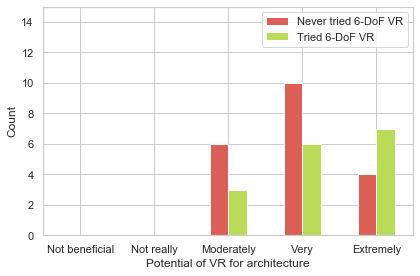

<Figure size 432x288 with 0 Axes>

In [57]:
#VRArchi-beneficial

# -VRArchi-beneficial-tried-actual-vr- barplot
sns.set_palette("hls", 5)
df_tried_vr_filtered = df.dropna(subset=['VRArchi-beneficial'])
df_tried_vr_filtered = df_tried_vr_filtered[['VRArchi-beneficial', 'tried-actual-vr']]

orderedX = ['notb', 'nrlyb', 'modb', 'veryb', 'xtrmb']  # , 'xtrmY'] #todo: add this one back if necessary
stack_categories = ['N', 'Y']

df_tried_vr_filtered = df_tried_vr_filtered.groupby('VRArchi-beneficial')['tried-actual-vr'].value_counts(dropna=False)

df_tried_vr_filtered = df_tried_vr_filtered.groupby('tried-actual-vr').transform(lambda x: x)
df_tried_vr_filtered = df_tried_vr_filtered.unstack()
print("@@@@@@@@@@")
print(df_tried_vr_filtered)

df_tried_vr_filtered.columns = pd.CategoricalIndex(df_tried_vr_filtered.columns.values,
                                                    ordered=True,
                                                    categories=stack_categories)

df_tried_vr_filtered = df_tried_vr_filtered.sort_index(axis=1)

ax = df_tried_vr_filtered.loc[orderedX].plot.bar(stacked=False, rot=0)
ax.set_ylim(ymax=15)
plt.ylabel("Count")
plt.xlabel("Potential of VR for architecture")
plt.legend(['Never tried 6-DoF VR', 'Tried 6-DoF VR'])
plt.xticks(np.arange(5), ('Not beneficial', 'Not really', 'Moderately', 'Very', 'Extremely'))
plt.tight_layout()

plt.show()
plt.clf()

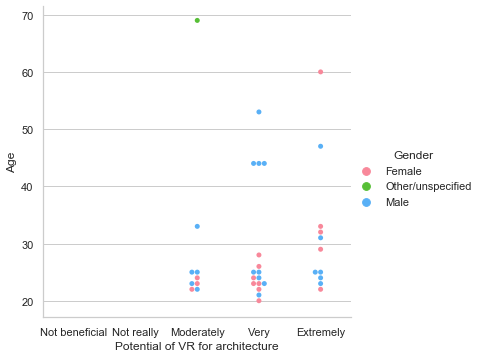

<Figure size 432x288 with 0 Axes>

In [58]:
# -swarm-VRArchi-beneficial-age
sns.set_style("whitegrid")
sns.set_palette("tab10",2)
g = sns.catplot(x="VRArchi-beneficial", y="Age", kind="swarm", order= ["notb", "nrlyb", "modb", "veryb", "xtrmb"], hue="Gender",data=df, legend_out=True)
g.set_xticklabels(['Not beneficial', 'Not really', 'Moderately', 'Very', 'Extremely'])
new_labels = ['Female', 'Other/unspecified', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.xlabel('Potential of VR for architecture')
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()
plt.clf()

#########
[0.0, 0.0, 0.25, 0.4444444444444444, 0.3055555555555556]


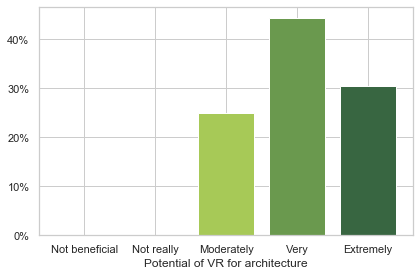

<Figure size 432x288 with 0 Axes>

In [59]:
# -bar-VRArchi-beneficial-
x = np.arange(5)
df_len = len(df)
beneficial_groups = [len(df[df["VRArchi-beneficial"] == 'notb']) / df_len,
                  len(df[df["VRArchi-beneficial"] == 'nrlyb']) / df_len,
                  len(df[df["VRArchi-beneficial"] == 'modb']) / df_len,
                  len(df[df["VRArchi-beneficial"] == 'veryb']) / df_len,
                  len(df[df["VRArchi-beneficial"] == 'xtrmb']) / df_len]
print("#########")
print(beneficial_groups)

percent_formatter = FuncFormatter(percent_format)

sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(percent_formatter)
plt.bar(x, beneficial_groups, color=sns.color_palette(['#bc4749', '#f2e8cf', '#a7c957', '#6a994e', '#386641']))
plt.xticks(x, ('Not beneficial', 'Not really', 'Moderately', 'Very', 'Extremely'))
plt.xlabel('Potential of VR for architecture')
plt.tight_layout()
plt.show()
plt.clf()